## Assignment W2: Simple image search
- Choose one image in your data that you want to be the 'target image'. Write a Python script or Notebook which does the following:
 - Use the cv2.compareHist() function to compare the 3D color histogram for your target image to each of the other images in the corpus one-by-one.
 - In particular, use chi-square distance method, like we used in class. Round this number to 2 decimal places.
 - Save the results from this comparison as a single .csv file, showing the distance between your target image and each of the other images. The .csv file should show the filename for every image in your data except the target and the distance metric between that image and your target. Call your columns: filename, distance.

__Libraries__

In [14]:
import os, glob
import sys
sys.path.append(os.path.join(".."))

import cv2
import numpy as np
import pandas as pd

from utils.imutils import jimshow
import matplotlib.pyplot as plt

__Paths__

In [15]:
# The path were the images are located
filepath = os.path.join("..","data", "17flowers", "*.jpg")

# The path were the data is going to be stored 
outpath = os.path.join("..","data", "17flowers", "flower_hist")
if os.path.exists(outpath) == False:
    os.mkdir(outpath)

__Target histogram__

In [16]:
# Define path to target flower
target_flower = cv2.imread(os.path.join("..","data", "17flowers", "image_0030.jpg"))

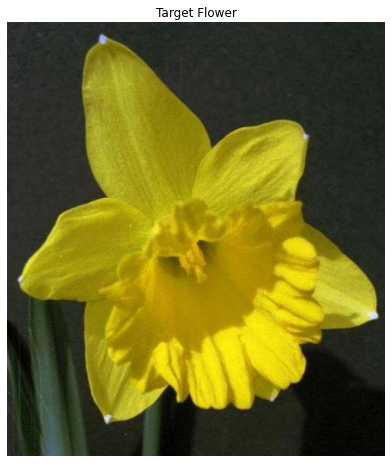

In [17]:
# Show the target flower
jimshow(target_flower, "Target Flower")

In [18]:
# Make histogram of target flower
target_hist = cv2.calcHist([target_flower], [0,1,2], None, [8,8,8], [0, 256, 0, 256, 0, 256])

# Normalize target flower histogram
norm_target_hist = cv2.normalize(target_hist, target_hist, 0,255, cv2.NORM_MINMAX)

__Create empty lists where the data will be stored__

In [19]:
filename = []
distance = []

__Loop over images__

In [20]:
for file in glob.glob(filepath):
    if file=="image_0030.jpg":
        pass
    else:
        # Only use the actual filename without the path
        image_filename = os.path.split(file)[1]

        # Read the files
        img = cv2.imread(file)
        
        # Create image hisogram
        image_hist = cv2.calcHist([img], [0,1,2], None, [8,8,8], [0, 256, 0, 256, 0, 256])

        # Normalize the image histogram
        norm_image_hist = cv2.normalize(image_hist, image_hist, 0,255, cv2.NORM_MINMAX)

        # Compare with target histogram
        comparison = round(cv2.compareHist(norm_target_hist, norm_image_hist, cv2.HISTCMP_CHISQR),2)

        # Compare histogram for each image with target flower
        #hist_distance = compare_hist(img, norm_target_hist)

        filename.append(image_filename)
        distance.append(comparison)


In [21]:
# Make a data frame with the two columns: filename and distance
flower_data = pd.DataFrame(
    {'filename': filename, 
     'distance': distance})

In [22]:
# Save the data as a csv file
outpath_flower_data = os.path.join("..","data", "17flowers", "flower_hist", "flower_data.csv")

flower_data.to_csv(outpath_flower_data)

__Print the filename of the image which is 'closest' to the target image__

In [25]:
# I sort the values in the 'distance' column in ascending order
flower_data.sort_values('distance', ascending=True)

# The image closest to the target image is image_0566 with a distance on 1728.66

,filename,distance
151,image_0030.jpg,0.00
68,image_0566.jpg,1728.66
1064,image_0948.jpg,1975.20
1315,image_0591.jpg,2296.43
70,image_1006.jpg,2663.36
...,...,...
1098,image_1100.jpg,27429185.80
189,image_0390.jpg,27920379.29
348,image_0675.jpg,39965887.85
30,image_0241.jpg,45024278.43


NB: it looks like my target image is still being added to my data frame even though i tried to exclude it. I simply can not figure out why it happens, so if you have any ideas I would love to hear them :) 